---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

**Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.**

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

**The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).** 

**Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.**
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, **return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.**

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

## ROC Curve and Area Under the Curve (AUC) Explained

- Used to visualize the performance of a binary classifier.
- Use logistic regression to develop a prediction and probability of the likelihood of the prediction.
<br><br>
- ROC plots the the FPR on the x-axis and the TPR on the y-axis for every possible classification threshold.
- TPR = True Positives / All Positives answers the question **When the actual classification is positive, how often does the model predict postive?**
- FPR = False Positive / All Negatives answers the question **When the actual classification is negative, how often does the model incorrectly predict positive?**

## Approach:

- What features are most relevant?
- Most likely need to map lattitude and longitude to blight-ticket compliance data.
- How should I explore the data?
- What to do with null compliant values?
- Seems to be a relationship between judgement_amount and compliance
- How does location play a role?

### Notes

**Tranforming String Objects to Quantitative Data**
- Use `LabelEncoder` or `OneHotEncoder` to translate categorical features to numerical values to use with sklearn.
- `LabelEncoder` assigns laber a with a value between 0 and n_classes-1. n is the # of distinct labels.
- When use `LabelEcoder` to transform to numerical value, must inform model that the numerical values are categorical. Do not want the model to assume correlations when not appropriate.
- By using `OneHotEncoder`, I can prevent the model from believing that the new numerical values are hiearchical.
- `OneHotEncoder` takes the econded columnas and divides it into multiple columns assigning 1s and 0s to the columns, depending on the columns' values.


## IMPORTANT CONCLUSION

- Calculate `y_prob`, **not** `y_pred`, by using `predict_proba()`, **not** `predict()`.
- Adjust `y_prob` when calculating FPR and TPR - `roc_curve(y_test, y_prob[:,1])`.
- Use `[:,1]` b/c `predict_proba()` returns a probability matrix of dimension (N,2). The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1.
- FPR and TPR are used to calculate AUC.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, 
import xgboost as xgb


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler





this is _switch_path ---- path =  C:\Users\morga\OneDrive\Documents\02. Education\12_UM_DS_Specialization\03_Applied_ML
this is _switch_path ---- path =  C:\Users\morga\Anaconda3\python37.zip
this is _switch_path ---- path =  C:\Users\morga\Anaconda3\DLLs
this is _switch_path ---- path =  C:\Users\morga\Anaconda3\lib
this is _switch_path ---- path =  C:\Users\morga\Anaconda3
this is _switch_path ---- path =  
this is _switch_path ---- path =  C:\Users\morga\AppData\Roaming\Python\Python37\site-packages
this is _switch_path ---- path =  C:\Users\morga\Anaconda3\lib\site-packages


---
# Data Import and Processing


In [4]:
train = pd.read_csv('train.csv', engine='python')
test = pd.read_csv('test.csv', engine='python')
address = pd.read_csv('addresses.csv', engine='python')
lat_lons = pd.read_csv('latlons.csv', engine='python')

In [7]:
address.head()

,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


In [8]:
lat_lons.head()

,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228
3,"5787 wayburn, Detroit MI",42.403342,-82.957805
4,"5766 haverhill, Detroit MI",42.407255,-82.946295


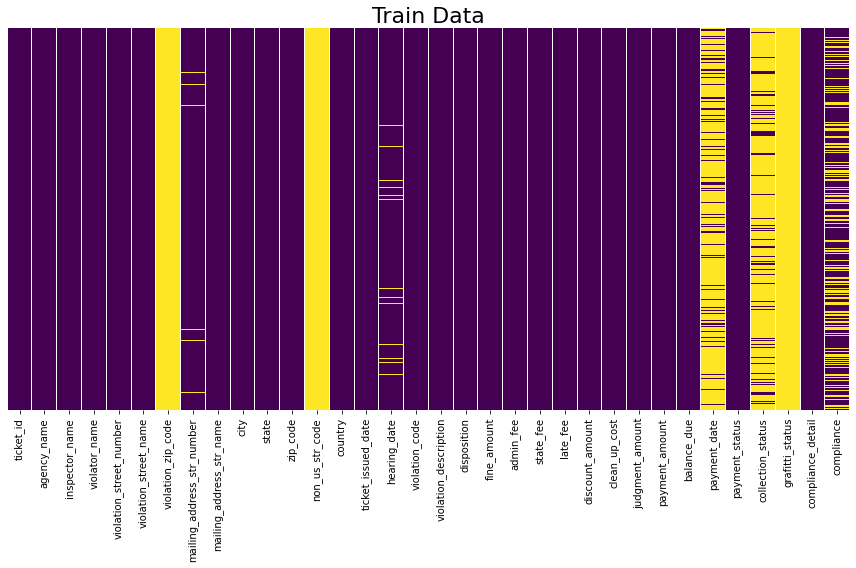

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Train Data', fontsize=22)
plt.tight_layout();

In [13]:
test.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,...,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,...,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,WOODHAVEN,...,Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,LIVONIA,...,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [17]:
train2.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
5,22046,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",6478.0,NORTHFIELD,NaN,2755.0,E. 17TH,LOG BEACH,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
6,18738,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Deerwood Development Group Inc, Deer",8027.0,BRENTWOOD,NaN,476.0,Garfield,Clinton,...,0.0,855.0,0.0,855.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
7,18735,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",8228.0,MT ELLIOTT,NaN,8228.0,Mt. Elliott,Detroit,...,0.0,140.0,0.0,140.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0


In [19]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159880 entries, 0 to 250293
Data columns (total 34 columns):
ticket_id                     159880 non-null int64
agency_name                   159880 non-null object
inspector_name                159880 non-null object
violator_name                 159854 non-null object
violation_street_number       159880 non-null float64
violation_street_name         159880 non-null object
violation_zip_code            0 non-null float64
mailing_address_str_number    157322 non-null float64
mailing_address_str_name      159877 non-null object
city                          159880 non-null object
state                         159796 non-null object
zip_code                      159879 non-null object
non_us_str_code               3 non-null object
country                       159880 non-null object
ticket_issued_date            159880 non-null object
hearing_date                  159653 non-null object
violation_code                159880 non-null obj

---
# EDA

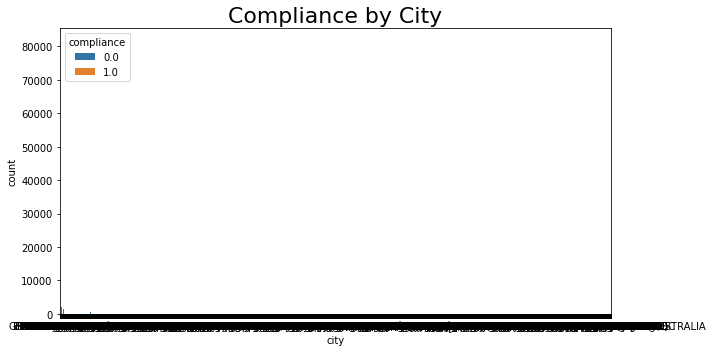

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='city', data=train2, hue='compliance')
plt.title('Compliance by City', fontsize=22)
plt.tight_layout();

# of Paid Blight Violations:  11597
# of Unpaid Blight Violations:  148283
# of Bligh Violation w/ Null Values:  90426
Total # of Blight Violiations:  250306
Are all blight violations accounted for? True


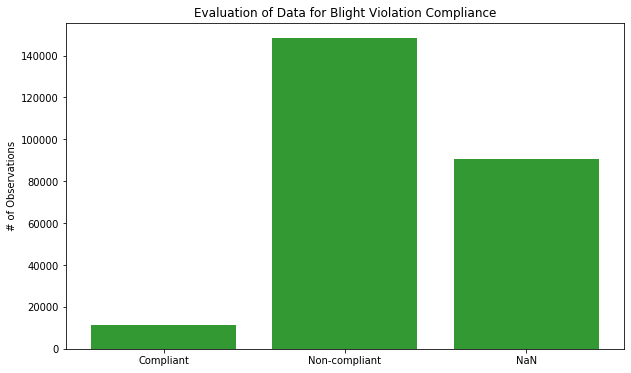

In [7]:
# Bar plot examing the breakdown of the "compliance" observations prior to imputation.
num_comp = list(train_df['compliance']).count(1)
num_non_comp = list(train_df['compliance']).count(0) 
num_na = sum(np.isnan(train_df['compliance']))
count_total = num_comp + num_non_comp + num_na

print('# of Paid Blight Violations: ', str(list(train_df['compliance']).count(1)))
print('# of Unpaid Blight Violations: ', str(list(train_df['compliance']).count(0)))
print('# of Bligh Violation w/ Null Values: ', str(sum(np.isnan(train_df['compliance']))))
print('Total # of Blight Violiations: ', str(len(train_df['compliance'])))
print('Are all blight violations accounted for?', count_total == len(train_df['compliance']))
                                                                                        
plot_labels = ['Compliant', 'Non-compliant', 'NaN'] 
plot_vals = [num_comp, num_non_comp, num_na]
x_pos = list(range(len(plot_labels)))

plt.figure(figsize=(10,6))
plt.bar(x_pos, plot_vals, align='center', color='g', alpha=0.8)

plt.ylabel('# of Observations')
plt.xticks(x_pos, plot_labels)
plt.title('Evaluation of Data for Blight Violation Compliance')
plt.show();



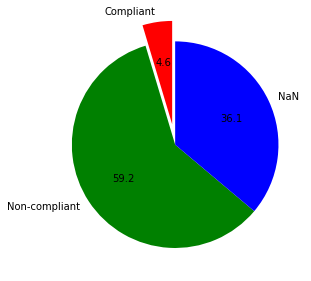

In [8]:
# Pie plot
# Can use the argument "explode" to "pull" a slice from the pie


#plt.figure(10,6)
plt.pie(plot_vals, labels=plot_labels, explode=(0.2, 0, 0), colors=['r', 'g','b'], startangle=90, autopct='%1.1f')
plt.tight_layout()
plt.show();

In [10]:
# Select desired parameters.
train_df = train_df[['violation_code', 'violation_description', 'judgment_amount', 'inspector_name', 
                     'lat', 'lon','compliance']]
test_df = test_df[['violation_code', 'violation_description', 'judgment_amount', 'inspector_name', 
                'lat', 'lon']]

##  Preprocess Data

In [11]:
# Drop NaN values
# Transform categorical features into numerical values.
# Normalize data using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

train_dropna = train_df.dropna(how='any')
test_dropna = test_df.dropna(how='any')

train_enc = train_dropna.apply(LabelEncoder().fit_transform)
test_enc = test_dropna.apply(LabelEncoder().fit_transform)

min_max_scaler = MinMaxScaler()

train_scaled = min_max_scaler.fit_transform(train_enc)
test_scaled = min_max_scaler.fit_transform(test_enc)

X_train = pd.DataFrame(train_scaled, columns=['violation_code', 'violation_description', 'judgment_amount', 'inspector_name', 
                     'lat', 'lon','compliance']).drop('compliance', axis=1)
y_train = train_enc['compliance']
X_test = pd.DataFrame(test_scaled, columns=['violation_code', 'violation_description', 'judgment_amount', 'inspector_name', 
                'lat', 'lon'])


# of Paid Blight Violations:  11597
# of Unpaid Blight Violations:  148281
# of Bligh Violation w/ Null Values:  0
Total # of Blight Violiations:  159878
Are all blight violations accounted for? True


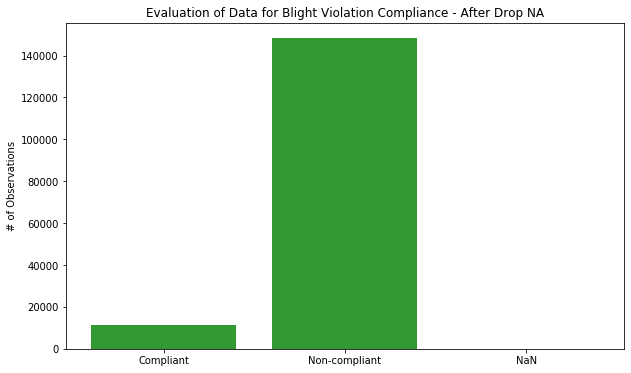

In [12]:
# Compare number of occurrences of compliance observations after dropping the NaN values.
y_comp = list(y_train).count(1)
y_non_comp = list(y_train).count(0) 
y_na = sum(np.isnan(y_train))
y_total = y_comp + y_non_comp + y_na

print('# of Paid Blight Violations: ', str(y_comp))
print('# of Unpaid Blight Violations: ', str(y_non_comp))
print('# of Bligh Violation w/ Null Values: ', str(y_na))
print('Total # of Blight Violiations: ', str(len(y_train)))
print('Are all blight violations accounted for?', y_total == len(y_train))
                                                                                        
y_vals = [y_comp, y_non_comp, y_na]

# Using the x_pos and plot_label variables from prior bar plot.
plt.figure(figsize=(10,6))
plt.bar(x_pos, y_vals, align='center', color='g', alpha=0.8)

plt.ylabel('# of Observations')
plt.xticks(x_pos, plot_labels)
plt.title('Evaluation of Data for Blight Violation Compliance - After Drop NA')
plt.show();

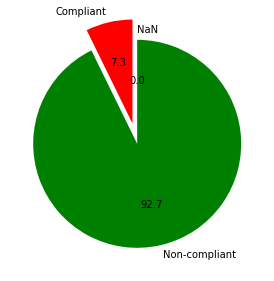

In [13]:
plt.pie(y_vals, labels=plot_labels, explode=(0.2, 0, 0), colors=['r', 'g','b'], startangle=90, autopct='%1.1f')
plt.tight_layout()
plt.show();

## Logistic Regression

In [19]:


# Standardize X_train b/c many more observations of noncompliance.
x_log = X_train[['violation_code','judgment_amount']]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_log, y_train, test_size=0.25, random_state=0)


log_reg_clf = LogisticRegression(solver='lbfgs').fit(X_train_log, y_train_log)
y_prob_log = log_reg_clf.predict_proba(X_test_log)
y_score_log = log_reg_clf.decision_function(X_test_log)

fpr_log, tpr_log, thresholds = roc_curve(y_test_log, y_prob_log[:,1])
roc_auc_log = auc(fpr_log, tpr_log)




"""
log_cnf_matrix = confusion_matrix(y_test_log, y_pred_log)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(log_cnf_matrix), annot=True, cmap="viridis", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix - Logistic Regression - Train Data')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

print('Accuracy: ', accuracy_score(y_test_log, y_pr_log))
print('Precision: ', precision_score(y_test_log, y_pred_log))
print('Recall: ', recall_score(y_test_log, y_pred_log))
print('F1 Score: ', f1_score(y_test_log, y_pred_log))
"""


print('AUC:',roc_auc_log)

AUC: 0.6554872210822102


In [ ]:
print(X_train_log.shape)
print(y_train_log.shape)

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig1, subaxes1 = plt.subplots(1, 1, figsize=(7,5))
plot_class_regions_for_classifier_subplot(log_reg_clf, X_train_log, y_train_log, None, None, 
                                          'Logistic Regression for Binary \
                                          Classification - Violation & Judgment Amount', subaxes1)

print('Accuracy of Logistic Regression Classifier on Training Set: {:.2f}'.format(log_reg_clf.score(X_train_log, y_train_log)))
print('Accuracy of Logistic Regression Classifier on Test Set: {:.2f}'.format(log_reg_clf.score(X_test_log, y_test_log)))

## Support Vector Machine - Classifier

In [ ]:


x_svm = X_train[['violation_code', 'violation_description', 'judgment_amount']]

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_train, test_size=0.25, random_state=0)
g_vals = [0.01, 0.1, 0.2, 1]

plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

for g in g_vals:
    svm = SVC(gamma=g).fit(X_train_svm, y_train_svm)
    y_pred_svm = svm.decision_function(X_test_svm)
    fpr_svm, tpr_svm, _ = roc_curve(y_test_svm, y_pred_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test_svm, y_test_svm)
    print('gamma = {0:.2f}  accuracy = {1:.2f}  AUC = {2:.2f}'.format(g, accuracy_svm, roc_auc_svm))
    
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, label='SVC (gamma = {0:.2f}, area = {1:.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.legend(loc='lower right', fontsize=11)
plt.title('RoC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(svc_model, X_train, y_train, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(svc_model, X_train, y_train, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(svc_model, X_train, y_train, cv=5, scoring = 'recall'))

## Naive Bayes Classifier 

In [51]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier



print(roc_auc_NB)

#plot_class_regions_for_classifier(nb_clf, X_train_NB, y_train_NB, X_test_NB, y_test_NB, 'Gaussian Naive Bayes Classifier')


"""
print('Accuracy of GaussianNB Classifier on training set: {:.2f}'.format(nb_clf.score(X_train_NB, y_train_NB)))
print('Accuracy of GaussianNB Classifier on test set: {:.2f}'.format(nb_clf.score(X_test_NB, y_test_NB)))
"""

0.6412427730312117


"\nprint('Accuracy of GaussianNB Classifier on training set: {:.2f}'.format(nb_clf.score(X_train_NB, y_train_NB)))\nprint('Accuracy of GaussianNB Classifier on test set: {:.2f}'.format(nb_clf.score(X_test_NB, y_test_NB)))\n"

## Gradient-boosted Decission Tree

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

X_gbdt = X_train[['judgment_amount', 'violation_code']]
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gbdt, y_train)
gbdt = GradientBoostingClassifier(random_state=0).fit(X_train_gb, y_train_gb)

y_pred_gb = gbdt.predict_proba(X_test_gb)
fpr_gbdt, tpr_gbdt, _ = roc_curve(y_test_gb,y_pred_gb[:,1])
roc_auc_gb = auc(fpr_gbdt, tpr_gbdt)


print('Accuracy of GBDT classifier on training set: {:.2f}'.format(gbdt.score(X_train_gb, y_train_gb)))
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(gbdt.score(X_test_gb, y_test_gb)))
print('AUC: ,{:.2f}'.format(roc_auc_gb))


Accuracy of GBDT classifier on training set: 0.93
Accuracy of GBDT classifier on training set: 0.93
AUC: ,0.78
